# **TASK : To predict concrete strength**

1.Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,VotingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

2.Load dataset

In [ ]:
df=pd.read_excel('/content/Concrete_Data.xls')

3.Descriptive analysis

In [ ]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

(None, (1030, 9))

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [ ]:
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'strength'
},inplace=True)

In [ ]:
df.columns

Index(['cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'strength'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1005, 9)

4.Data preprocessing

In [ ]:
from scipy.stats import zscore

In [ ]:
z_scores = zscore(df.select_dtypes(include=[float, int]))
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
outliers_rows=df[outliers]

In [ ]:
outliers_rows.shape

(49, 9)

In [ ]:
from scipy.stats.mstats import winsorize
for col in df.select_dtypes(include=[float, int]).columns:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

cement


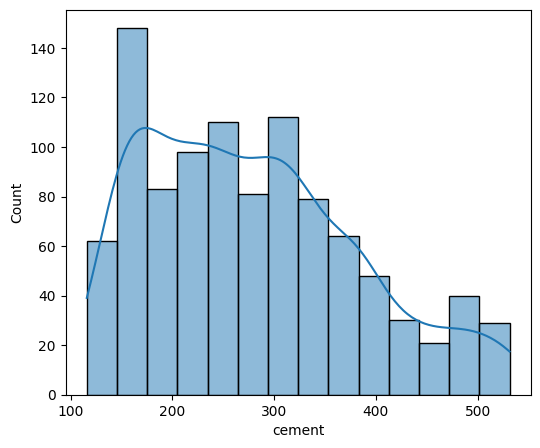

Slag


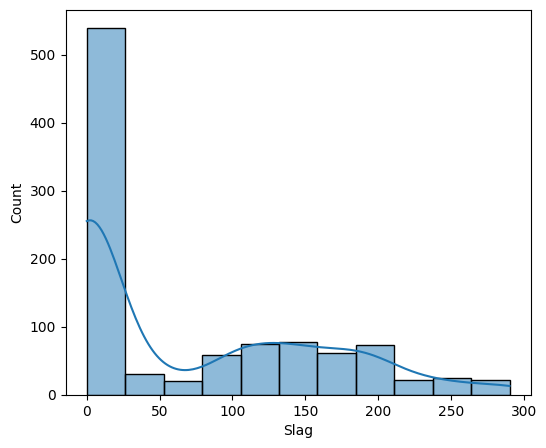

Fly Ash


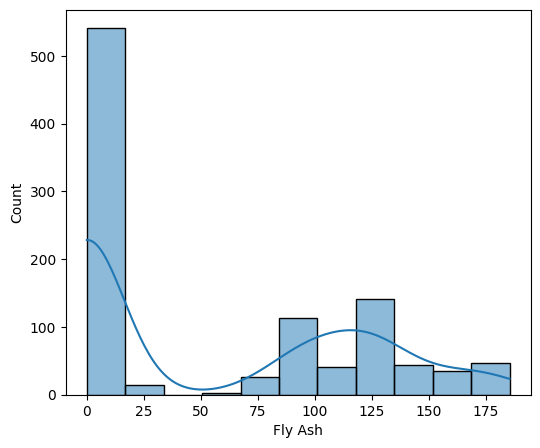

Water


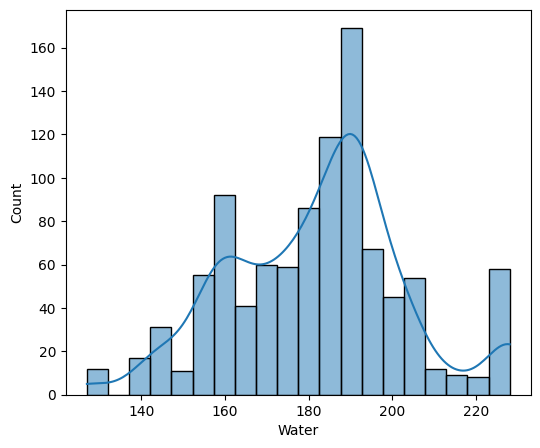

Superplasticizer


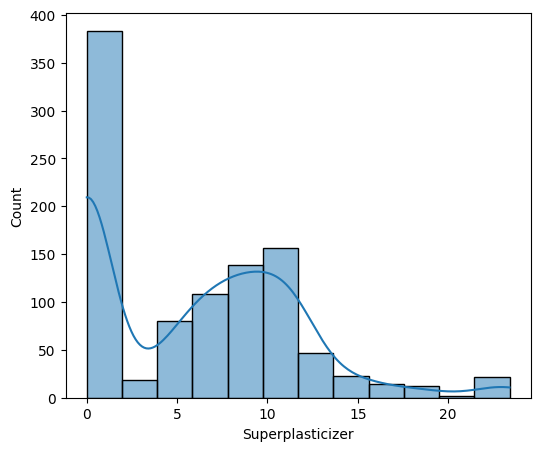

Coarse Aggregate


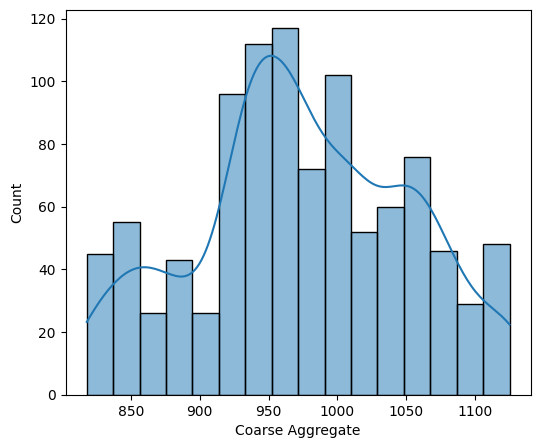

Fine Aggregate


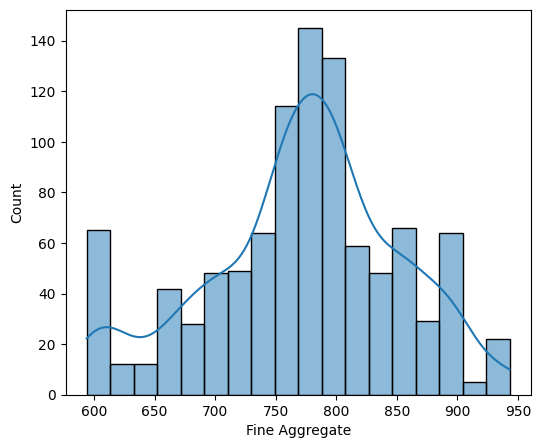

Age


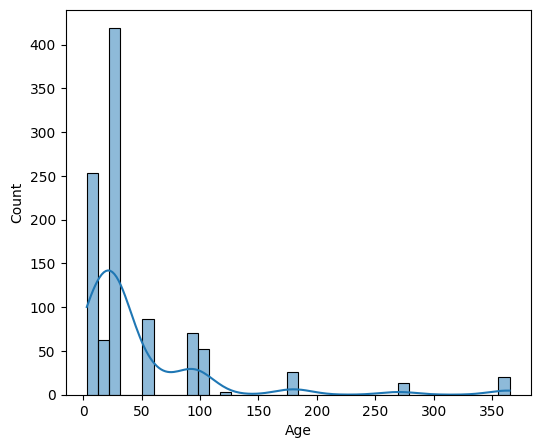

strength


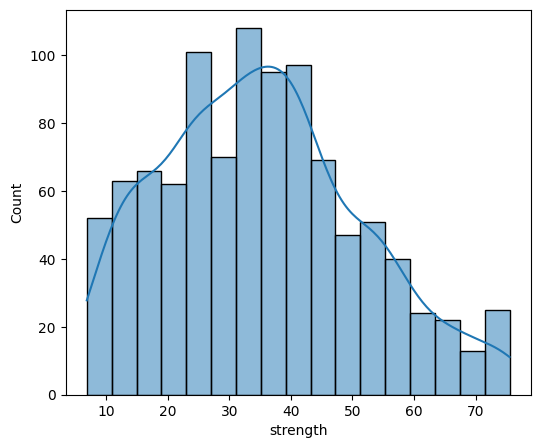

In [ ]:
for i in df.columns:
  plt.figure(figsize=(6,5))
  print(i)
  sns.histplot(df[i],kde=True)
  plt.show()

In [ ]:
df.skew()

,0
cement,0.562982
Slag,0.796623
Fly Ash,0.487075
Water,0.017172
Superplasticizer,0.649904
Coarse Aggregate,-0.058234
Fine Aggregate,-0.305985
Age,3.254295
strength,0.372134


In [ ]:
df['Age'] = np.log1p(df['Age'])
df['Superplasticizer'] = np.log1p(df['Superplasticizer'])
df['Slag'] = np.sqrt(df['Slag'])
df['Fly Ash'] = np.sqrt(df['Fly Ash'])
df['cement'] = np.sqrt(df['cement'])

5.Model training

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('strength',axis=1),
                                               df['strength'],test_size=0.2,random_state=42,shuffle=True)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((804, 8), (201, 8), (804,), (201,))

a).Base learner 1 - RandomForest

In [ ]:
rf=RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_training_score=rf.score(X_train,y_train)
rf_testing_score=rf.score(X_test,y_test)
print(rf_training_score,rf_testing_score)

0.9820569774211161 0.9092377691419473


b).Base learner 2 - SupportVectorMachine

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
svm=SVR(kernel='rbf',C=50,epsilon=0.1,gamma=0.1)
svm.fit(X_train_scaled,y_train)
print(svm.score(X_train_scaled,y_train),svm.score(X_test_scaled,y_test))

0.9389082544432154 0.9112123055593182


c). Ensemble learner - VotingRegressor

In [ ]:
vot_reg=VotingRegressor(
    estimators=[('rf',rf),('svm',svm)]
)
vot_reg.fit(X_train_scaled,y_train)
vot_reg.score(X_train_scaled,y_train),vot_reg.score(X_test_scaled,y_test)

(0.9694234129078402, 0.9236219915466678)

d).Bagging+KFold

In [ ]:
model=BaggingRegressor(
    estimator=svm,
    n_estimators=50,oob_score=True,random_state=42
)
model.fit(X_train_scaled,y_train)
model.oob_score_
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
results=cross_val_score(model,X_train_scaled,y_train,cv=kfold)
results.mean()

np.float64(0.8981099221094249)

In [ ]:
model.score(X_train_scaled,y_train),model.score(X_test_scaled,y_test)

(0.9392737245266414, 0.9150208928700547)

In [ ]:
results

array([0.91564649, 0.90362858, 0.90355694, 0.88723522, 0.8293003 ,
       0.88478294, 0.92081663, 0.90622403, 0.90775971, 0.92214838])

**VotingReressor generalizes better**

# **Final pipeline for deployment**

In [ ]:
from sklearn.pipeline import Pipeline

# Step 1: Apply preprocessing
def preprocess(df):
    df = df.copy()
    df['Age'] = np.log1p(df['Age'])
    df['Superplasticizer'] = np.log1p(df['Superplasticizer'])
    df['Slag'] = np.sqrt(df['Slag'])
    df['Fly Ash'] = np.sqrt(df['Fly Ash'])
    df['cement'] = np.sqrt(df['cement'])
    return df

# Step 2: Prepare data
df = preprocess(df)
X = df.drop('strength', axis=1)
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define models
rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features='sqrt', random_state=42)
svr = SVR(kernel='rbf', C=50, epsilon=0.1, gamma=0.1)

# Step 4: Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', VotingRegressor(estimators=[('rf', rf), ('svr', svr)]))
])

# Step 5: Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9142240092298675


**Saving model for deployment**

In [ ]:
import joblib

# Save the pipeline
joblib.dump(pipeline, 'voting_pipeline.pkl')

['voting_pipeline.pkl']